# Support Vector Machine

### Data preprocessing

In [26]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split # for training and testing split
from sklearn.preprocessing import StandardScaler # for Feature scaling
from sklearn.svm import SVC # for classifier
from sklearn.metrics import confusion_matrix # for making confusion matrix
from matplotlib.colors import ListedColormap # for Visualisation
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]

In [27]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [16]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [28]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [19]:
X_train[0:10]

array([[    27,  57000],
       [    46,  28000],
       [    39, 134000],
       [    44,  39000],
       [    57,  26000],
       [    32, 120000],
       [    41,  52000],
       [    48,  74000],
       [    26,  86000],
       [    22,  81000]])

In [20]:
X_test[0:10]

array([[    46,  22000],
       [    59,  88000],
       [    28,  44000],
       [    48,  96000],
       [    29,  28000],
       [    30,  62000],
       [    47, 107000],
       [    29,  83000],
       [    40,  75000],
       [    42,  65000]])

In [22]:
y_train[0:10]

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [23]:
y_test[0:10]

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [30]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fitting SVM classifier to the Training set

In [31]:
classifier = SVC(kernel = 'linear', random_state = 42) # SVC is a linear classifier here
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

### Predicting the Test set results

In [32]:
y_pred = classifier.predict(X_test)

In [13]:
y_pred[0:10]

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [14]:
y_test[0:10]

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

### Making the Confusion Matrix

In [33]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[50,  2],
       [ 9, 19]])

* * *

**classifier made 50 + 19 = 69 correct prediction and 9 + 2 = 11 incoreect predictions.**

* * *

### Visualising the Training set results

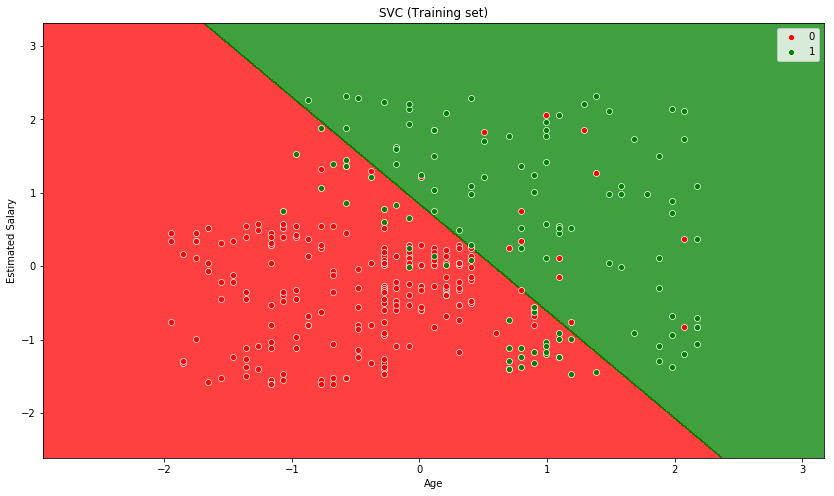

In [35]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, edgecolors = 'white', linewidth = 0.7)
plt.title('SVC (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

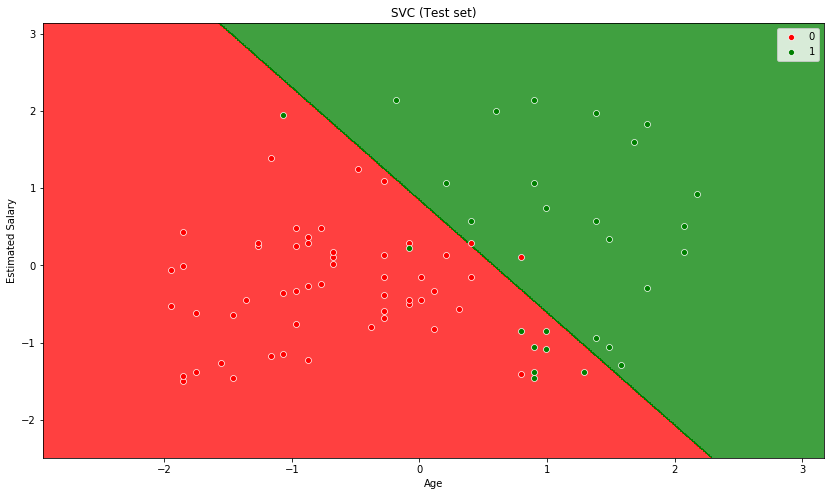

In [37]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, edgecolors = 'white', linewidth = 0.7)
plt.title('SVC (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

* * *

**So there is not much change as compare to the Logistic Regression**

* * *